# Exercise Week 1 - data and distributions

For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

These datasets contain the data of the number of steps and survey data. 

This exercise contains: Creating Dataframes, Merging dataframes, Creating a distplot, excluding specific data from the dataframe, Creating a mean and median, Creating a boxplot and 

## Import both dataframes

Both datasets are placed in to a pandas dataframe. 

In [49]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep=';', engine='python') # use sep by ';' because the EU annotation
df1.head() # this shows the head of the dataframe in the output

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df2 = pd.read_csv('survey.csv')
df2.head() # this shows the head of the dataframe in the output

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


## Merging the documents

Both datasets need to be merged in a new data frame to create 1 dataset. 

In [51]:
df = pd.merge(df1, df2, on = "id") #'id' is the common identifier
df.head() # this shows the head of the dataframe in the output

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [52]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


## Create the first plot

This plot is created to determine the outliers of the dataset. In the plot some input at 700 can be seen. This is likely to be faulty data. 

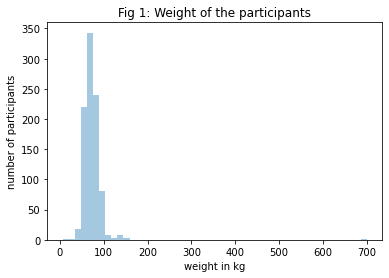

In [53]:
sns.distplot(df["weight"].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title("Fig 1: Weight of the participants")
plt.xlabel('weight in kg')
plt.ylabel('number of participants')
plt.show()

# Create second plot which excludes the weight above 170 and below 40

In the next plot the weight above 170 is excluded. A new plot is created to determine the outliers at the bottom of the plot. Based on that result al dat below 40 is excluded as well, which leads to the final plot. 

In [54]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values above 170 we need to create a function that we then apply to the entire column
def above_170(x):
    if(x > 170): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_170)


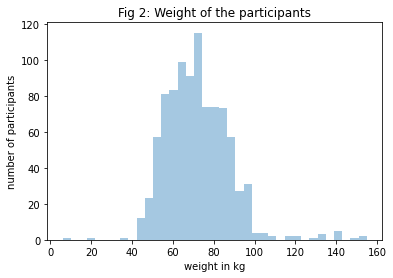

In [55]:
sns.distplot(df["weight"].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Fig 2: Weight of the participants')
plt.xlabel('weight in kg')
plt.ylabel('number of participants')
plt.show()

In [56]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#To remove the values below 40 we need to create a function that we then apply to the entire column
def below_40(x):
    if(x < 40): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_40)

## Weight plot
### Weight plot excluding weights under 40 and above 170

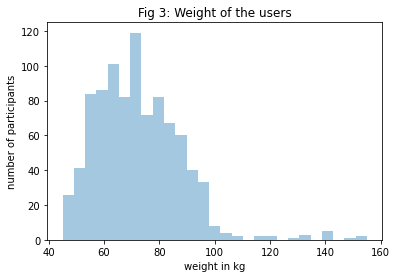

In [57]:
sns.distplot(df["weight"].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title("Fig 3: Weight of the users")
plt.xlabel('weight in kg')
plt.ylabel('number of participants')
plt.show()

## Plot a series
Within the next steps the weight of the participants is plotted. 

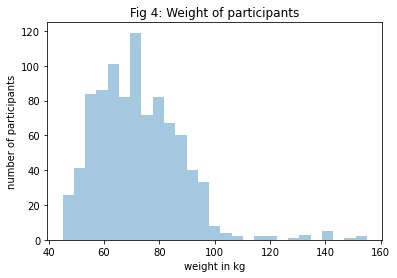

In [58]:
df['weight'].name = 'Weight' #Labeling the variable for plotting
file_size = df['weight'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(df["weight"], kde=False) 
plt.title('Fig 4: Weight of participants')
plt.xlabel('weight in kg')
plt.ylabel('number of participants')
plt.show()

The median weight is: 71.0
The mean weight is: 72.3228602383532


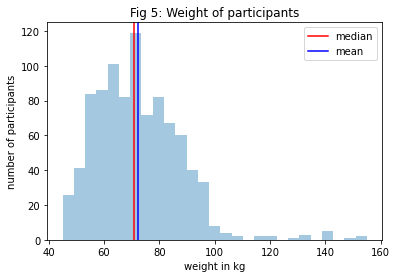

In [59]:
mean_weight = df['weight'].mean()
median_weight = df['weight'].median()

print(f'The median weight is: {median_weight}')
print(f'The mean weight is: {mean_weight}')

sns.distplot(df["weight"], kde=False)
plt.title('Fig 5: Weight of participants')
plt.xlabel('weight in kg')
plt.ylabel('number of participants')
plt.axvline(median_weight, 0, 100, color='red', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_weight, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

## Create a boxplot
Within the next steps a boxplot of the participant weight is created. 

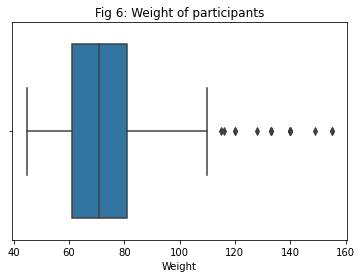

In [60]:
sns.boxplot(df['weight'])
plt.title('Fig 6: Weight of participants')
plt.xlabel('Weight')
plt.show()

## Distplot
Distplot with an included rugplot

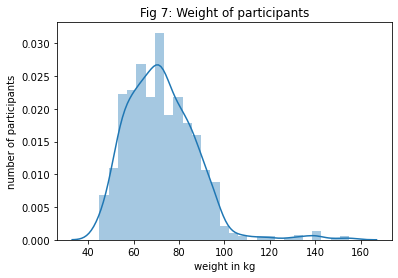

In [61]:
sns.distplot(df["weight"])
plt.title('Fig 7: Weight of participants')
plt.xlabel('weight in kg')
plt.ylabel('number of participants')
plt.show() 

Note: the functionality for 'distplot' will disappear from sns. Therefore, the code must be adapted to one of the two new functions: 
displot(), a figure-level function with a similar flexibility over the kind of plot to draw OR
histplot(), an axes-level function for plotting histograms, including with kernel density smoothing
https://seaborn.pydata.org/generated/seaborn.distplot.html

## Summary of the statistics 
The "mean" is the "average" we're used to, where you add up all the numbers and then divide by the number of numbers. Within this dataframe the mean can be seen in fig 5 and is rounded 72.33 kg. 

Where as, the "median" is the "middle" value in the list of numbers. To find the median, your numbers have to be listed in numerical order from smallest to largest, so you may have to rewrite your list before you can find the median. The median of this dataframe can also be seen in fig 5 and is 71.0 kg. 

## Discussion
Verbal description of the distribution, including an investigation into its normality, skewness, outliers, etc

Within the first figure (Fig 1) some outliers can be seen at 700 and under 40. A healthy weight chart or BMI chart from NHS (2020) shows that 40 kg is the lowest included weight. Where as 170 kg is the highest included weight. Therefore, the outliers most likely exist of a faulty data entry. 

NHS (2020, April 7). Height and weight chart. Nhs.Uk. https://www.nhs.uk/live-well/healthy-weight/height-weight-chart/